In [1]:
from os import listdir
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extracting the given data

In [2]:
def extract_filename(path):
	return listdir(path)

In [3]:
path = "c:/Users/Siyi/OneDrive/UNIMELB/COMP20008/COMP20008-Elements-of-Data-Processing/Phase3/dataset"
filelist = extract_filename(path)

In [4]:
def read_excel_file(filename):
    name = "./dataset/" + filename
    return xlrd.open_workbook(name)

# Helper FUnction

In [5]:
def extract_LGA_name(workbook):
    worksheet = workbook.sheet_by_name('Cover')
    LGA = worksheet.cell(8,1).value
    LGAname = ""
    for char in LGA:
        LGAname += char
        if char == "(":
            break
    LGAname = LGAname[:-1]
    return LGAname

In [6]:
def extract_median_income(workbook):
    worksheet = workbook.sheet_by_name('B 02')
    median_income = worksheet.cell(14,1).value
    return median_income

In [7]:
worksheet = read_excel_file('BCP_LGA20570.XLS').sheet_by_name('B 24')
print("threechild" , worksheet.cell(12,4).value)
print("total" , worksheet.cell(12,9).value)
print("not stated" , worksheet.cell(12,8).value)
#12 correspond to row13, 4 correspond to column E

threechild 4.0
total 3446.0
not stated 276.0


# Age 15-19 has index  12, Threechildren has index 4

In [8]:
#.cell(row_index, column_index)
#Total family number = cell(,9) - cell(,8)

In [46]:
def extract_children_proportion_by_age(workbook):
    #the function return a list such that:
    #[15-19 multichildren ratio, 20-24 multichildren ratio,.......]
    age_index = {"15-19 years":12,
                    "20-24 years":13,
                    "25-29 years":14,
                    "30-34 years":15,
                    "35-39 years":16,
                    "40-44 years":17,
                    "45-49 years":18,
                    "50-54 years":19,
                    "55-59 years":20,
                    "60-64 years":21,
                    "65-69 years":22,
                    "70-74 years":23,
                    "75-79 years":24,
                    "80-84 years":25,
                    "85 years up":26,
                    "Total Groups":27}
    children_index = {"three":4,"four":5, "five":6, "six up":7, "allchildren":8}
    
   
    worksheet = workbook.sheet_by_name('B 24')
    
    result = []
    #total_family = (worksheet.cell(28,9).value - worksheet.cell(28,8).value)
    
    i = 12
    while i < age_index["Total Groups"]:
    
        total_family_this_age = 0
        multi_children = 0
        
        total_family_this_age += (worksheet.cell(i,9).value - worksheet.cell(i,8).value)
        for j in range(children_index["three"],children_index["allchildren"]):
            multi_children += worksheet.cell(i,j).value
        
        if (i >= 14) and (i < age_index["85 years up"]):
            i += 1
            total_family_this_age += (worksheet.cell(i,9).value - worksheet.cell(i,8).value)
            for j in range(children_index["three"],children_index["allchildren"]):
                multi_children += worksheet.cell(i,j).value
            
        result.append(multi_children / total_family_this_age * 100)
        i +=1
        
    return result

In [77]:
def extract_female_highincome_by_age(workbook):
    worksheet = workbook.sheet_by_name('B 17a')
    high_income_ratio = []
    
    
    
    
    #setting up threashold
    high_income = 39 #over 1500 a week inclusive
    
    for age in range(1,10):
        #excluding personal income not stated and negative/income
        total_female_this_age = worksheet.cell(44,age).value - worksheet.cell(42,age).value
        high_income_people = 0
        
        for income_level in range(high_income,41):
            high_income_people += worksheet.cell(income_level,age).value
            
        high_income_ratio.append(high_income_people / total_female_this_age * 100)
        #print(age, total_female_this_age, high_income_people)
    return high_income_ratio

In [76]:
def extract_female_lowincome_by_age(workbook):
    #this function include female from negative/nill income to 1499 income inclusive
    worksheet = workbook.sheet_by_name('B 17a')
    low_income_ratio = []
    
    
    
    
    #setting up threashold
    high_income = 39 #under 1500 a week exclusive
    
    for age in range(1,10):
        #excluding personal income not stated and negative/income
        total_female_this_age = worksheet.cell(44,age).value - worksheet.cell(42,age).value
        low_income_people = 0
        
        for income_level in range(30, high_income):
            low_income_people += worksheet.cell(income_level,age).value
            
        low_income_ratio.append(low_income_people / total_female_this_age *100)
        #print(age, total_female_this_age, low_income_people)
    return low_income_ratio

In [72]:
def merge_mutlichildren_ratio(data):
    print(data)
    merged_data = [data[0], data[1]]
    i = 2
    while i < len(data) - 1:
        merged_data.append(data[i] + data[i+1])
        i += 2
    merged_data.append(data[-1])
    print(merged_data)
    return merged_data
        
    

# Creating the data from excel

In [78]:
namelist = []
median_income = []
multichildren_ratio = []
female_highincome = []
female_lowincome = []

for filename in filelist[:32]:
    workbook = read_excel_file(filename)
    namelist.append(extract_LGA_name(workbook))
    #median_income.append(extract_median_income(workbook))
    multichildren_ratio.append(extract_children_proportion_by_age(workbook))
    female_highincome.append(extract_female_highincome_by_age(workbook))
    female_lowincome.append(extract_female_lowincome_by_age(workbook))

# Merge data into one frame work

In [133]:
female_high_income = pd.DataFrame(
columns = ("15-19 years",
 "20-24 years",
 "25-34 years",
 "35-44 years",
 "45-54 years",
 "55-64 years",
 "65-74 years",
 "75-84 years",
 "85 over years"
))
for i in range(32):
    female_high_income.loc[i] = female_highincome[i]
female_high_income.insert(0, "LGA(>1500 a week)", namelist)
female_high_income.name = "female high income ratio"

In [134]:
female_high_income

,LGA(>1500 a week),15-19 years,20-24 years,25-34 years,35-44 years,45-54 years,55-64 years,65-74 years,75-84 years,85 over years
0,Ballarat,0.125510,0.455451,4.185639,7.360027,9.278521,5.818724,1.533315,1.364764,0.923077
1,Banyule,0.192246,0.447604,11.391569,13.344494,15.565980,9.150236,2.167787,1.652635,1.682848
2,Bayside,0.275699,0.688705,18.088737,25.417386,24.631637,17.140850,8.120341,5.850654,4.732637
3,Boroondara,0.114112,1.031614,17.507542,28.370787,27.722857,20.461572,9.153401,7.882146,8.011160
4,Brimbank,0.075472,0.485987,4.097978,5.380003,4.204705,2.145300,0.480769,0.436954,0.362319
5,Casey,0.189260,0.422157,4.165492,5.984536,6.010896,3.895297,1.068200,0.775862,0.587803
6,Darebin,0.000000,0.535821,9.145578,15.681964,13.531599,7.433844,0.869759,0.817080,0.772201
7,Frankston,0.157687,0.483953,4.923039,6.728173,6.800800,4.699140,1.003272,0.547845,1.159679
8,Glen Eira,0.096154,0.558269,13.092042,21.685793,19.816151,12.251509,3.811385,2.913453,3.727317
9,Greater Bendigo,0.268416,0.321637,4.214691,7.488424,8.124271,5.246555,1.385390,1.082335,1.061947


In [135]:
female_low_income = pd.DataFrame(
columns = ("15-19 years",
 "20-24 years",
 "25-34 years",
 "35-44 years",
 "45-54 years",
 "55-64 years",
 "65-74 years",
 "75-84 years",
 "85 over years"
))
for i in range(32):
    female_low_income.loc[i] = female_lowincome[i]
female_low_income.insert(0, "LGA(<1500 a week)", namelist)
female_low_income.name = "female low income ratio"

In [136]:
female_low_income #percentage of all recorded people at this age

,LGA(<1500 a week),15-19 years,20-24 years,25-34 years,35-44 years,45-54 years,55-64 years,65-74 years,75-84 years,85 over years
0,Ballarat,99.874490,99.544549,95.814361,92.639973,90.721479,94.181276,98.466685,98.635236,99.076923
1,Banyule,99.807754,99.552396,88.608431,86.655506,84.434020,90.849764,97.832213,98.347365,98.317152
2,Bayside,99.724301,99.311295,81.911263,74.582614,75.368363,82.859150,91.879659,94.149346,95.267363
3,Boroondara,99.885888,98.968386,82.492458,71.629213,72.277143,79.538428,90.846599,92.117854,91.988840
4,Brimbank,99.924528,99.514013,95.902022,94.619997,95.795295,97.854700,99.519231,99.563046,99.637681
5,Casey,99.810740,99.577843,95.834508,94.015464,93.989104,96.104703,98.931800,99.224138,99.412197
6,Darebin,100.000000,99.464179,90.854422,84.318036,86.468401,92.566156,99.130241,99.182920,99.227799
7,Frankston,99.842313,99.516047,95.076961,93.271827,93.199200,95.300860,98.996728,99.452155,98.840321
8,Glen Eira,99.903846,99.441731,86.907958,78.314207,80.183849,87.748491,96.188615,97.086547,96.272683
9,Greater Bendigo,99.731584,99.678363,95.785309,92.511576,91.875729,94.753445,98.614610,98.917665,98.938053


In [137]:
female_multichildren_ratio = pd.DataFrame(
columns = ("15-19 years",
 "20-24 years",
 "25-34 years",
 "35-44 years",
 "45-54 years",
 "55-64 years",
 "65-74 years",
 "75-84 years",
 "85 over years"
))
for i in range(32):
    female_multichildren_ratio.loc[i] = multichildren_ratio[i]
    
female_multichildren_ratio.insert(0, "LGA(>=3 is multichildren)", namelist)
female_multichildren_ratio.name = 'multichildren ratio'

In [138]:
female_multichildren_ratio

,LGA(>=3 is multichildren),15-19 years,20-24 years,25-34 years,35-44 years,45-54 years,55-64 years,65-74 years,75-84 years,85 over years
0,Ballarat,0.252366,1.112696,12.313043,32.825802,40.195122,45.147679,56.693767,63.875969,52.662722
1,Banyule,0.252845,0.343461,4.532355,20.898506,28.312447,36.165577,46.920136,54.934710,46.158730
2,Bayside,0.000000,0.274348,3.014934,22.481171,26.591965,28.544391,38.147281,49.909256,41.226216
3,Boroondara,0.113766,0.000000,1.899325,21.163499,27.859903,31.423270,39.472753,47.759771,42.398884
4,Brimbank,0.185839,0.662680,8.639692,27.062286,36.611599,42.057504,50.870580,57.577566,51.225697
5,Casey,0.213675,1.085846,11.710306,30.726342,36.676576,40.257257,51.001616,59.265442,52.024708
6,Darebin,0.101420,0.298805,3.393778,15.545915,22.644729,33.738030,46.118919,51.703967,46.189918
7,Frankston,0.078329,0.988343,9.655671,26.600442,34.333720,36.609647,49.347873,55.260398,45.826514
8,Glen Eira,0.223285,0.162942,3.040360,18.252883,23.378859,26.963351,35.194867,43.555317,34.146341
9,Greater Bendigo,0.355345,1.225919,13.871847,34.632919,41.718322,45.728234,57.142857,62.337179,55.511182


# Finish data cleaning and wrangling
Start visualization

In [157]:
def scatter_best_fit(df1, column1, df2, column2, df3 = None, column3 = None):
    plt.scatter(x = df1[column1], y = df2[column2])
    
    x1 = df1[column1]
    y1 = df2[column2]
    m1,b1 = np.polyfit(x1,y1,1)
    plt.plot(x1,m1*x1 + b1, '-')
    
    if df3 != None:
        plt.scatter(x = df1[column1], y = df3[column3])
        y2 = df3[column3]
        m2,b2 = np.polyfit(x1,y2,1)
        plt.plot(x1, m2*x1 + b2, '-')
    
    plt.suptitle(column1)
    plt.xlabel(df1.name, fontsize=18)
    plt.ylabel(df2.name, fontsize=16)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    #plt.show()
    print(df1[column1].corr(df2[column2], method =  'pearson'))

In [158]:
def plot_all_group(df1, df2, df3):
    df1columns = list(df1.columns)[1:]
    df2columns = list(df2.columns)[1:]
    df3columns = list(df3.columns)[1:]
    
    for i in range(len(df1columns)):
        column1 = df1columns[i]
        column2 = df2columns[i]
        column3 = df3columns[i]
        #scatter_best_fit(df1, column1, df2, column2, df3, column3)
        scatter_best_fit(df1, column1, df2, column2)
    plt.show()

0.142443076034
-0.325441494784
-0.864883521929
-0.825850962888
-0.80761219294
-0.771766396826
-0.648579406355
-0.529579035037
-0.492117182307


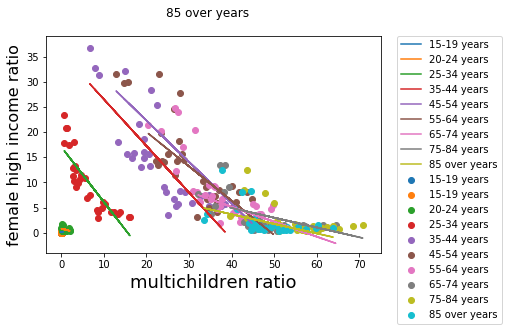

In [159]:
plot_all_group(female_multichildren_ratio, female_high_income, female_low_income)